In [1]:
import spotipy
import spotipy.oauth2
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import time

%matplotlib inline

The first few chunks are commented out because they were used to generate the csv relevant for plotting analysis data. For the purpose of memory usage, I have exported the csv and reimported the relevant data in a few chunks below.

In [2]:
#dat = pd.read_csv('regions_500mb_no_timbres.csv')

In [3]:
#dat = dat.drop('Unnamed: 0', axis = 'columns')

In [4]:
#dat.head(2)

In [5]:
#dat = dat.sort_values('Position', ascending=True).drop_duplicates(subset = ['Region', 'uri'], keep = 'first').sort_index()
#all_dat.drop_duplicates(subset=['Region', 'uri'], keep='first')
#the following line checks the drop duplicates
#print(dat.shape) #should be 72291, 78
#dat.head(2)

In [6]:
#dat.to_csv('rel_graph_data.csv')

In [2]:
dat = pd.read_csv('rel_graph_data.csv')

In [3]:
dat = dat.drop('Unnamed: 0', axis = 'columns')
dat.head(2)

,Position,Track Name,Artist,Streams,URL,Date,Region,acousticness,analysis_url,danceability,...,global,nl,bo,lv,gr,pa,uy,au,pt,fi
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,0.400,https://api.spotify.com/v1/audio-analysis/3AEZ...,0.761,...,True,True,True,False,False,True,True,False,True,False
1,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,ec,0.198,https://api.spotify.com/v1/audio-analysis/0sXv...,0.736,...,True,False,True,False,False,True,True,False,True,False


In [9]:
dat.shape

(72291, 78)

In [4]:
dat.loc[dat['Region'] == 'global', 'Region'] = 'w'

In [5]:
dat.rename(columns={'global':'w'}, inplace=True)

In [12]:
set(dat['Region'].values)

{'ar',
 'at',
 'au',
 'be',
 'bo',
 'br',
 'ca',
 'ch',
 'cl',
 'co',
 'cr',
 'cz',
 'de',
 'dk',
 'do',
 'ec',
 'ee',
 'es',
 'fi',
 'fr',
 'gb',
 'gr',
 'gt',
 'hk',
 'hn',
 'hu',
 'id',
 'ie',
 'is',
 'it',
 'jp',
 'lt',
 'lu',
 'lv',
 'mx',
 'my',
 'nl',
 'no',
 'nz',
 'pa',
 'pe',
 'ph',
 'pl',
 'pt',
 'py',
 'se',
 'sg',
 'sk',
 'sv',
 'tr',
 'tw',
 'us',
 'uy',
 'w'}

In [13]:
from pandasql import *

In [14]:
sqldf("SELECT * FROM dat LIMIT 10;", locals())

,Position,Track Name,Artist,Streams,URL,Date,Region,acousticness,analysis_url,danceability,...,w,nl,bo,lv,gr,pa,uy,au,pt,fi
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,0.4000,https://api.spotify.com/v1/audio-analysis/3AEZ...,0.761,...,1,1,1,0,0,1,1,0,1,0
1,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,ec,0.1980,https://api.spotify.com/v1/audio-analysis/0sXv...,0.736,...,1,0,1,0,0,1,1,0,1,0
2,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,ec,0.0244,https://api.spotify.com/v1/audio-analysis/5mey...,0.680,...,1,0,1,0,0,1,1,0,1,0
3,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ec,0.0760,https://api.spotify.com/v1/audio-analysis/58IL...,0.899,...,1,0,1,0,0,1,1,0,0,0
4,14,DUELE EL CORAZON,Enrique Iglesias,8309,https://open.spotify.com/track/6YZdkObH88npeKr...,2017-01-01,ec,0.0786,https://api.spotify.com/v1/audio-analysis/6YZd...,0.724,...,1,0,1,0,0,1,1,0,1,1
5,16,Borro Cassette,Maluma,7586,https://open.spotify.com/track/6DUdDIRgLqCGq1D...,2017-01-01,ec,0.1320,https://api.spotify.com/v1/audio-analysis/6DUd...,0.730,...,1,0,1,0,0,1,1,0,0,0
6,20,Desde Esa Noche,Thalía,6779,https://open.spotify.com/track/1pWYnQIlqxTh5bx...,2017-01-01,ec,0.1710,https://api.spotify.com/v1/audio-analysis/1pWY...,0.780,...,1,0,1,0,0,1,1,0,0,0
7,22,La Gozadera,Gente De Zona,6521,https://open.spotify.com/track/0OMRAvrtLWE2Tvc...,2017-01-01,ec,0.1660,https://api.spotify.com/v1/audio-analysis/0OMR...,0.616,...,1,0,1,0,0,1,1,0,1,0
8,27,Gyal You A Party Animal,Charly Black,5601,https://open.spotify.com/track/1mSzZKMIPZIkn3j...,2017-01-01,ec,0.0272,https://api.spotify.com/v1/audio-analysis/1mSz...,0.599,...,0,0,1,0,0,1,0,0,1,0
9,28,Baila Conmigo,Juan Magán,5586,https://open.spotify.com/track/772io14jrMTxGJb...,2017-01-01,ec,0.0866,https://api.spotify.com/v1/audio-analysis/772i...,0.875,...,0,0,1,0,0,1,1,0,0,0


In [15]:
by_mean = sqldf("""
SELECT
  AVG(acousticness) AS avg_acousticness
  , AVG(danceability) AS avg_danceability
  , AVG(energy) AS avg_energy
  , AVG(instrumentalness) AS avg_instrumentalness
  , AVG(key) AS avg_key
  , AVG(liveness) AS avg_liveness
  , AVG(loudness) AS avg_loudness
  , AVG(speechiness) AS avg_speechiness
  , AVG(tempo) AS avg_tempo
  , AVG(valence) AS avg_valence
  , Region
FROM
  dat
GROUP BY
     Region;
""", locals())

In [16]:
by_mean.head(5)

,avg_acousticness,avg_danceability,avg_energy,avg_instrumentalness,avg_key,avg_liveness,avg_loudness,avg_speechiness,avg_tempo,avg_valence,Region
0,0.185542,0.681010,0.711653,0.011345,5.197154,0.176054,-5.532071,0.086678,120.482351,0.592863,ar
1,0.215433,0.648852,0.658460,0.016199,5.262981,0.178936,-6.544677,0.122914,118.384523,0.474259,at
2,0.212548,0.642288,0.636579,0.013756,5.298507,0.176729,-6.652282,0.103609,119.390473,0.476991,au
3,0.247638,0.650547,0.647599,0.030322,5.312156,0.175253,-6.803731,0.116735,119.359046,0.481316,be
4,0.193240,0.690994,0.702786,0.002978,5.115242,0.174061,-5.456792,0.091017,120.683307,0.579027,bo


In [17]:
set(by_mean['Region'].values)

{'ar',
 'at',
 'au',
 'be',
 'bo',
 'br',
 'ca',
 'ch',
 'cl',
 'co',
 'cr',
 'cz',
 'de',
 'dk',
 'do',
 'ec',
 'ee',
 'es',
 'fi',
 'fr',
 'gb',
 'gr',
 'gt',
 'hk',
 'hn',
 'hu',
 'id',
 'ie',
 'is',
 'it',
 'jp',
 'lt',
 'lu',
 'lv',
 'mx',
 'my',
 'nl',
 'no',
 'nz',
 'pa',
 'pe',
 'ph',
 'pl',
 'pt',
 'py',
 'se',
 'sg',
 'sk',
 'sv',
 'tr',
 'tw',
 'us',
 'uy',
 'w'}

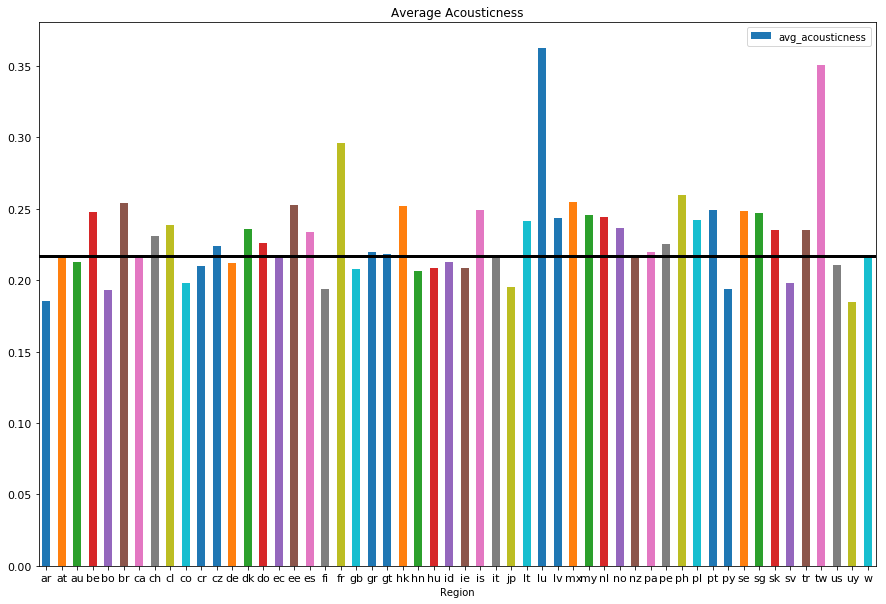

In [18]:
measuring = 'avg_acousticness'
by_mean.plot.bar(x='Region', y = measuring, rot=0, title='Average Acousticness', figsize=(15,10), fontsize=11,)
plt.axhline(by_mean[by_mean['Region'] == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('avg_acousticness.png', bbox_inches='tight')

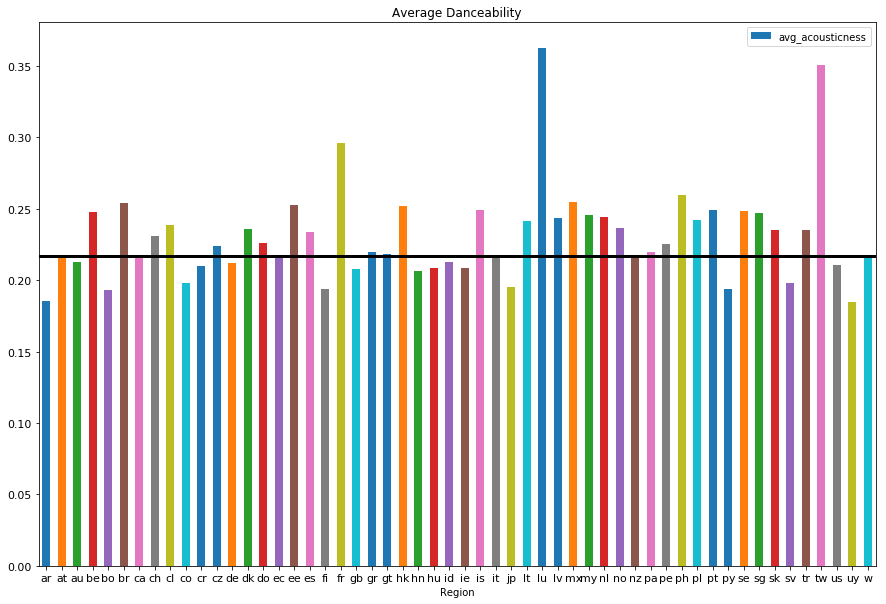

In [19]:
masuring = 'avg_danceability'
by_mean.plot.bar(x='Region', y = measuring, rot=0, title='Average Danceability', figsize=(15,10), fontsize=11,)
plt.axhline(by_mean[by_mean['Region'] == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('avg_danceability.png', bbox_inches='tight')

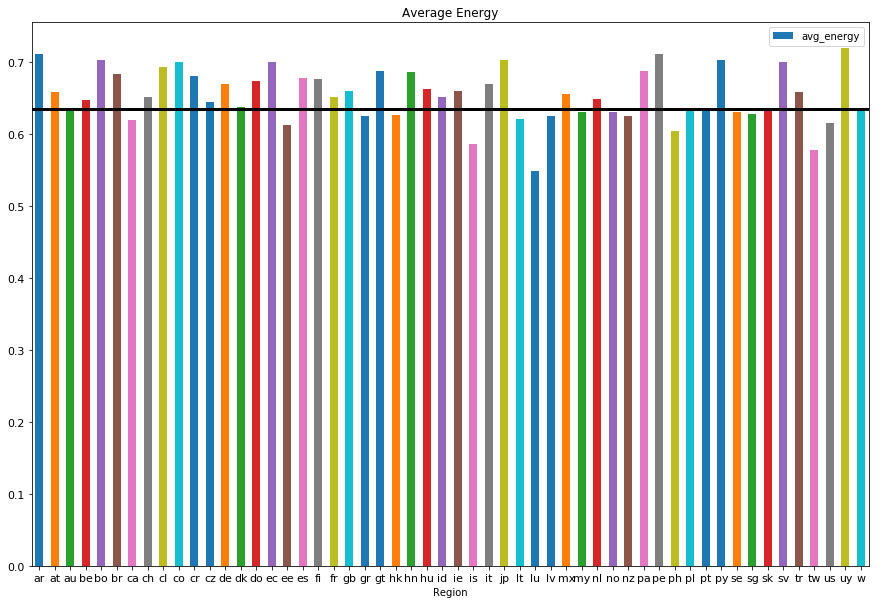

In [20]:
measuring = 'avg_energy'
by_mean.plot.bar(x='Region', y = measuring, rot=0, title='Average Energy', figsize=(15,10), fontsize=11,)
plt.axhline(by_mean[by_mean['Region'] == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('avg_energy.png', bbox_inches='tight')

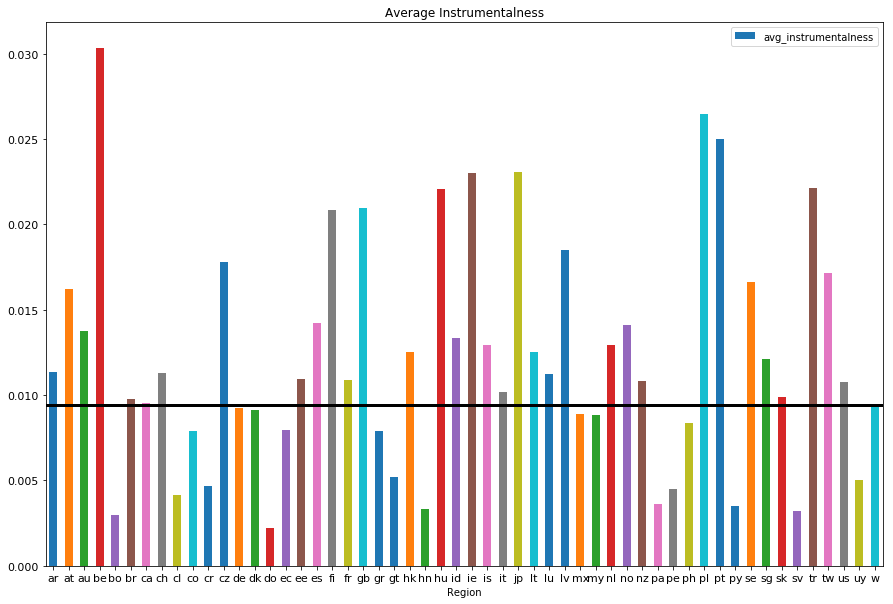

In [21]:
measuring = 'avg_instrumentalness'
by_mean.plot.bar(x='Region', y = measuring, rot=0, title='Average Instrumentalness', figsize=(15,10), fontsize=11,)
plt.axhline(by_mean[by_mean['Region'] == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('avg_instrumentalness.png', bbox_inches='tight')

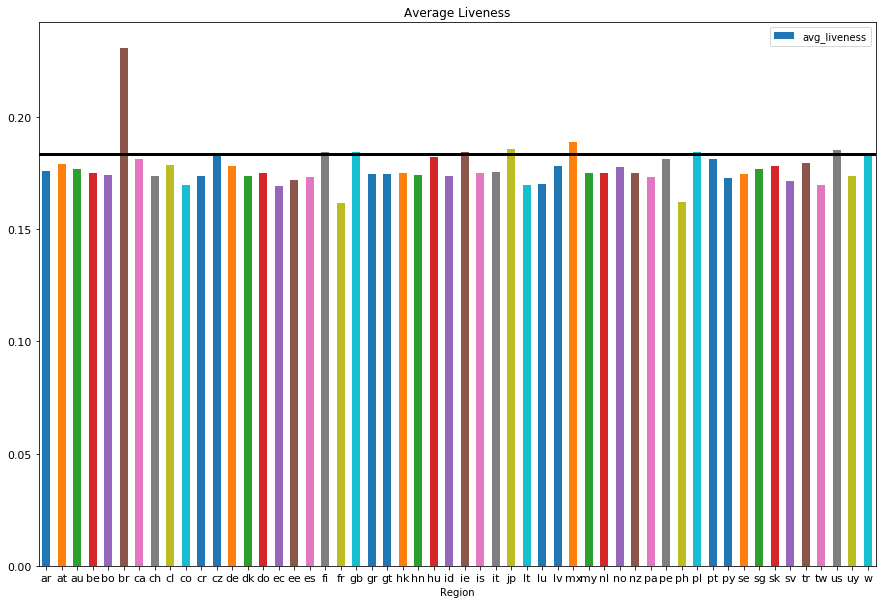

In [22]:
measuring = 'avg_liveness'
by_mean.plot.bar(x='Region', y = measuring, rot=0, title='Average Liveness', figsize=(15,10), fontsize=11,)
plt.axhline(by_mean[by_mean['Region'] == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('avg_liveness.png', bbox_inches='tight')

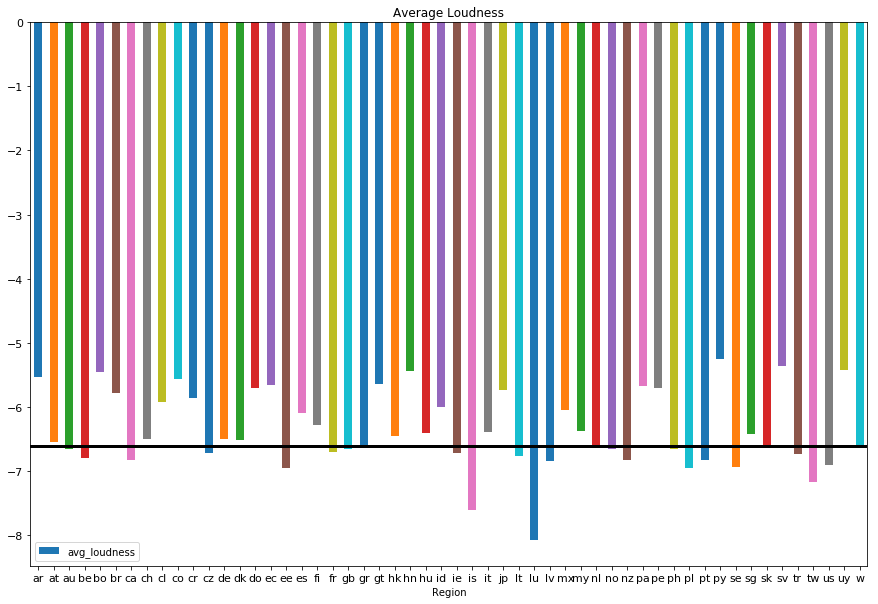

In [23]:
measuring = 'avg_loudness'
by_mean.plot.bar(x='Region', y = measuring, rot=0, title='Average Loudness', figsize=(15,10), fontsize=11,)
plt.axhline(by_mean[by_mean['Region'] == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('avg_loudness.png', bbox_inches='tight')

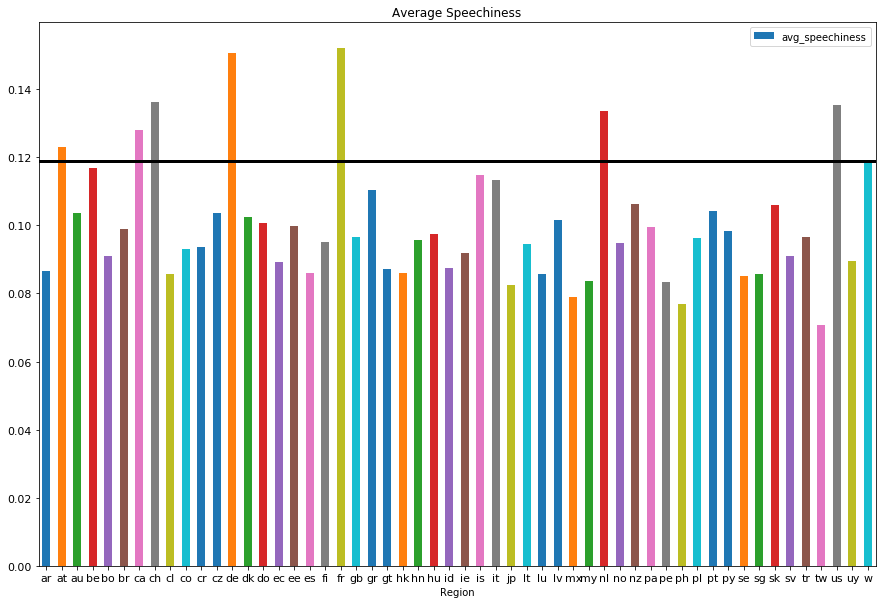

In [24]:
measuring = 'avg_speechiness'
by_mean.plot.bar(x='Region', y = measuring, rot=0, title='Average Speechiness', figsize=(15,10), fontsize=11,)
plt.axhline(by_mean[by_mean['Region'] == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('avg_speechiness.png', bbox_inches='tight')

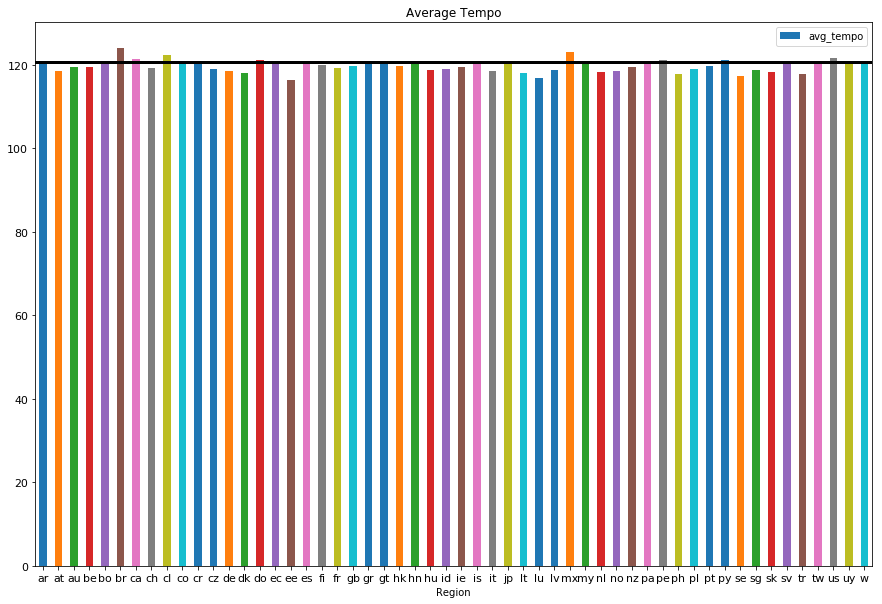

In [25]:
measuring = 'avg_tempo'
by_mean.plot.bar(x='Region', y = measuring, rot=0, title='Average Tempo', figsize=(15,10), fontsize=11,)
plt.axhline(by_mean[by_mean['Region'] == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('avg_tempo.png', bbox_inches='tight')

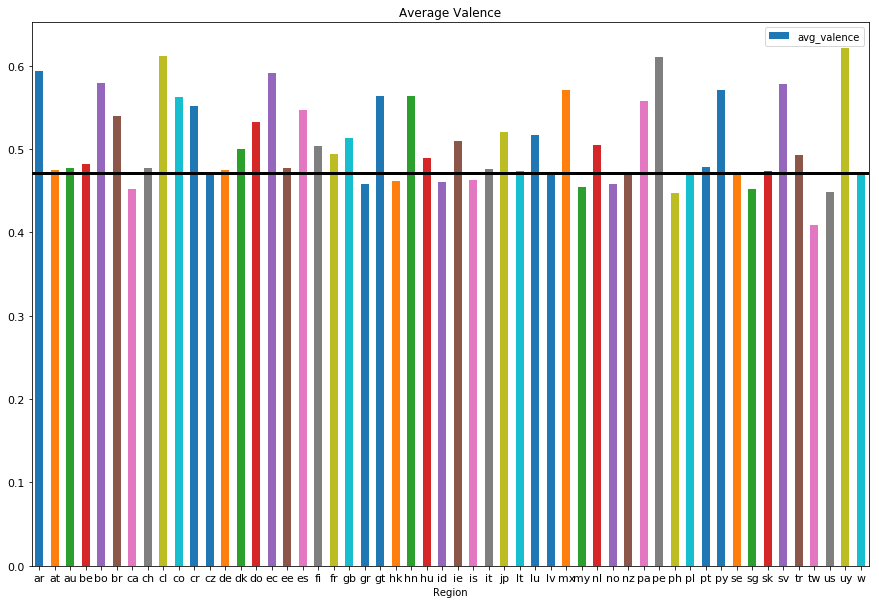

In [26]:
measuring = 'avg_valence'
by_mean.plot.bar(x='Region', y = measuring, rot=0, title='Average Valence', figsize=(15,10), fontsize=11,)
plt.axhline(by_mean[by_mean['Region'] == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('avg_valence.png', bbox_inches='tight')

In [6]:
by_var= dat.groupby('Region').agg(np.std)
by_var.head(5)

,Position,Streams,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,...,w,nl,bo,lv,gr,pa,uy,au,pt,fi
Region,,,,,,,,,,,,,,,,,,,,,
ar,56.688142,39647.634808,0.195675,0.131445,65532.414346,0.147869,0.463953,0.079300,3.727732,0.133282,...,0.497966,0.467925,0.499260,0.430258,0.447963,0.498913,0.404115,0.468689,0.493928,0.461871
at,56.478966,5706.953051,0.242102,0.144549,51242.996016,0.178480,0.469555,0.088786,3.649978,0.141733,...,0.499926,0.493233,0.351894,0.461850,0.475073,0.391174,0.383718,0.495168,0.499202,0.490211
au,59.432021,48322.492305,0.250010,0.146254,43859.213393,0.184694,0.499986,0.079407,3.702188,0.135549,...,0.426970,0.493523,0.407779,0.499155,0.499964,0.454756,0.441855,0.000000,0.452326,0.498559
be,56.773460,6879.329325,0.261307,0.150667,49430.028039,0.184356,0.474887,0.136345,3.654992,0.139350,...,0.499208,0.499083,0.356251,0.478230,0.488472,0.400550,0.388875,0.499486,0.499268,0.491624
bo,36.101387,1738.712095,0.199760,0.117434,37565.089472,0.159195,0.499080,0.022167,3.639954,0.133131,...,0.461549,0.500244,0.000000,0.493094,0.498299,0.340785,0.340785,0.499787,0.484211,0.500119


In [28]:
by_var.index

Index(['ar', 'at', 'au', 'be', 'bo', 'br', 'ca', 'ch', 'cl', 'co', 'cr', 'cz',
       'de', 'dk', 'do', 'ec', 'ee', 'es', 'fi', 'fr', 'gb', 'gr', 'gt', 'hk',
       'hn', 'hu', 'id', 'ie', 'is', 'it', 'jp', 'lt', 'lu', 'lv', 'mx', 'my',
       'nl', 'no', 'nz', 'pa', 'pe', 'ph', 'pl', 'pt', 'py', 'se', 'sg', 'sk',
       'sv', 'tr', 'tw', 'us', 'uy', 'w'],
      dtype='object', name='Region')

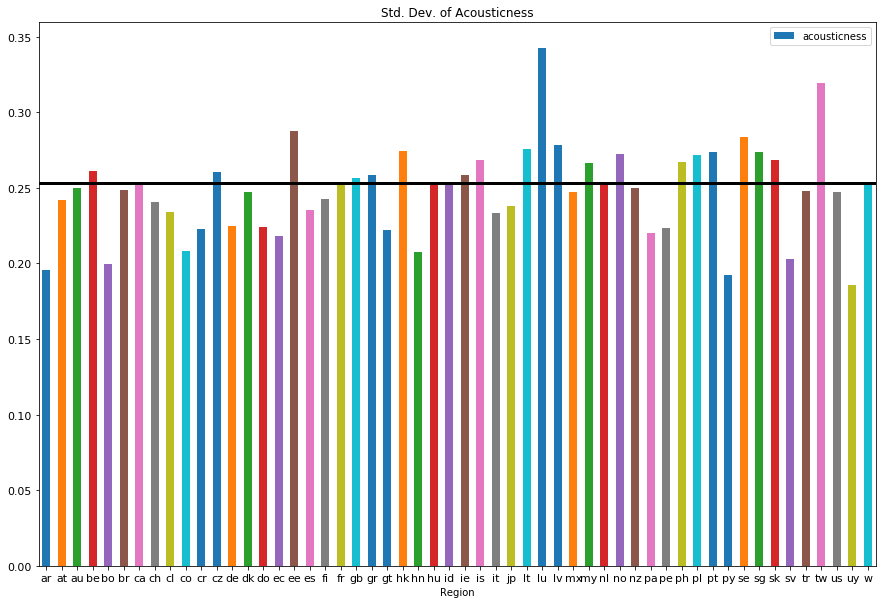

In [7]:
measuring = 'acousticness'
by_var.plot.bar(x=by_var.index, y = measuring, rot=0, title='Std. Dev. of Acousticness', figsize=(15,10), fontsize=11,)
plt.axhline(by_var[by_var.index == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('dev_acousticness.png', bbox_inches='tight')

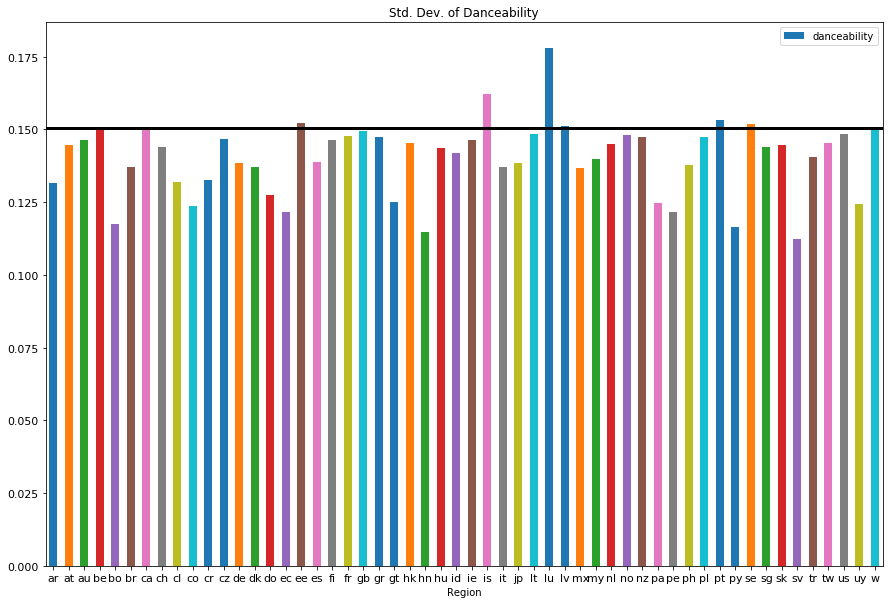

In [30]:
measuring = 'danceability'
by_var.plot.bar(x=by_var.index, y = measuring, rot=0, title='Std. Dev. of Danceability', figsize=(15,10), fontsize=11,)
plt.axhline(by_var[by_var.index == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('dev_danceability.png', bbox_inches='tight')

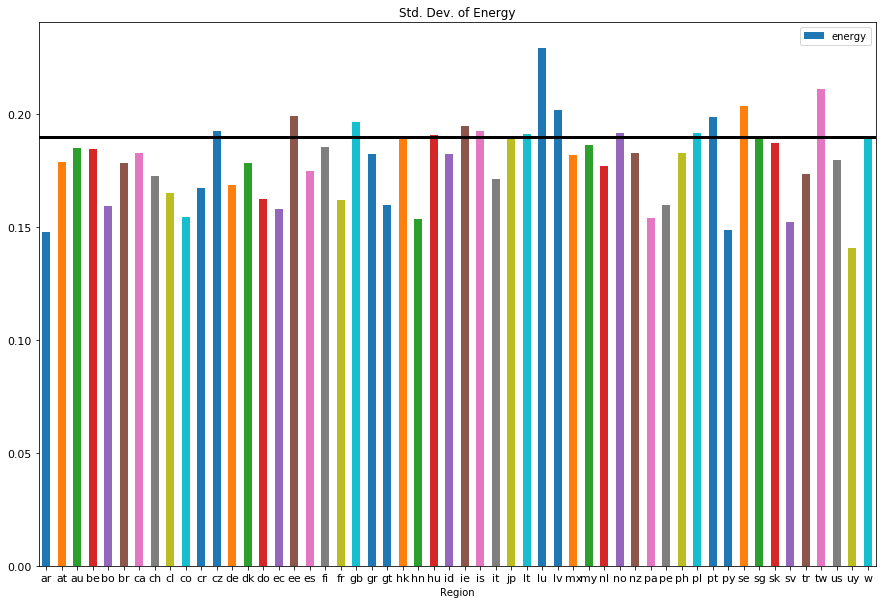

In [31]:
measuring = 'energy'
by_var.plot.bar(x=by_var.index, y = measuring, rot=0, title='Std. Dev. of Energy', figsize=(15,10), fontsize=11,)
plt.axhline(by_var[by_var.index == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('dev_energy.png', bbox_inches='tight')

In [ ]:
measuring = 'instrumentalness'
by_var.plot.bar(x=by_var.index, y = measuring, rot=0, title='Std. Dev. of Instrumentalness', figsize=(15,10), fontsize=11,)
plt.axhline(by_var[by_var.index == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('dev_instrumentalness.png', bbox_inches='tight')

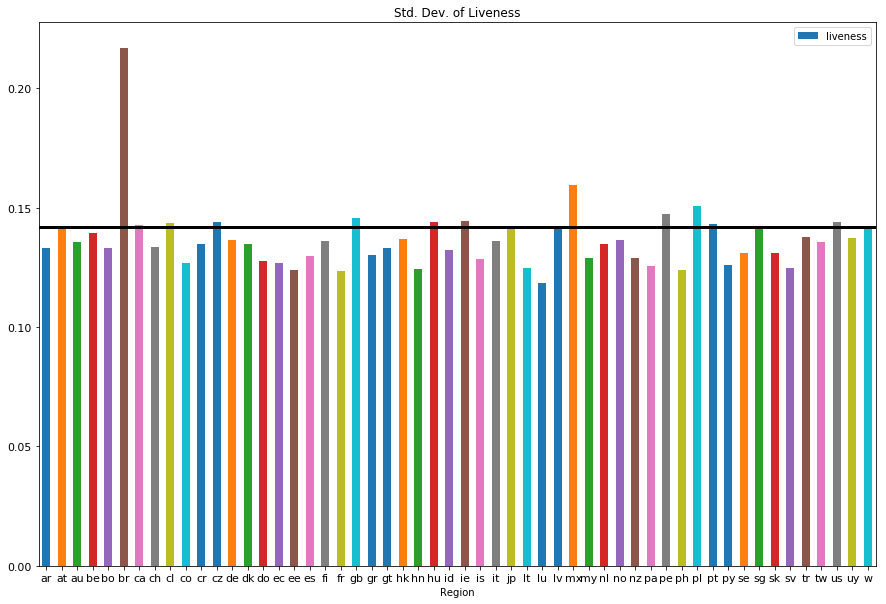

In [33]:
measuring = 'liveness'
by_var.plot.bar(x=by_var.index, y = measuring, rot=0, title='Std. Dev. of Liveness', figsize=(15,10), fontsize=11,)
plt.axhline(by_var[by_var.index == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('dev_liveness.png', bbox_inches='tight')

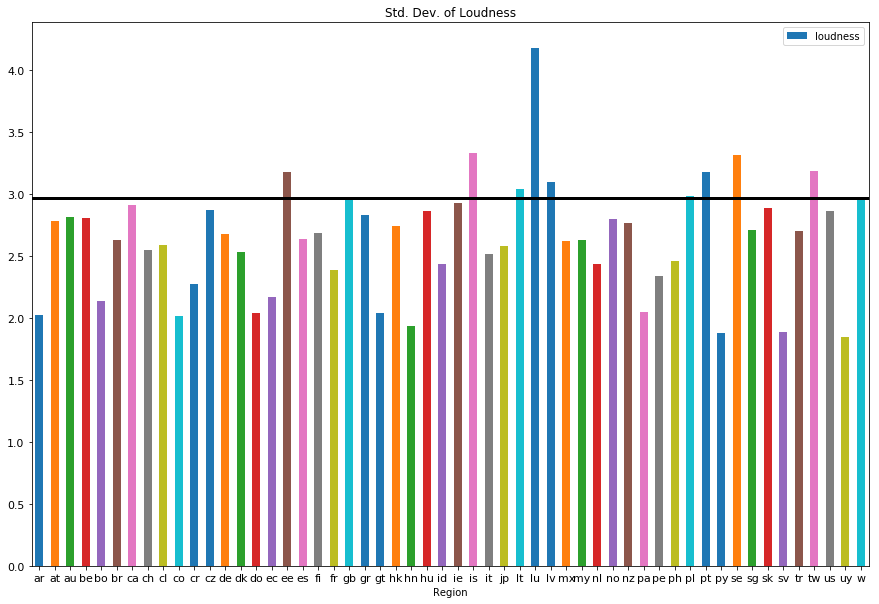

In [34]:
measuring = 'loudness'
by_var.plot.bar(x=by_var.index, y = measuring, rot=0, title='Std. Dev. of Loudness', figsize=(15,10), fontsize=11,)
plt.axhline(by_var[by_var.index == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('dev_loudness.png', bbox_inches='tight')

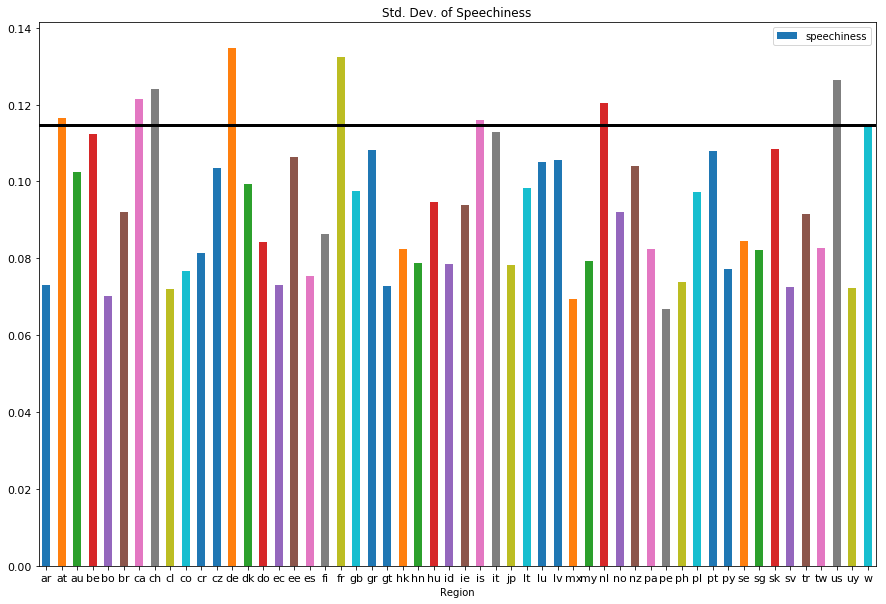

In [35]:
measuring = 'speechiness'
by_var.plot.bar(x=by_var.index, y = measuring, rot=0, title='Std. Dev. of Speechiness', figsize=(15,10), fontsize=11,)
plt.axhline(by_var[by_var.index == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('dev_speechiness.png', bbox_inches='tight')

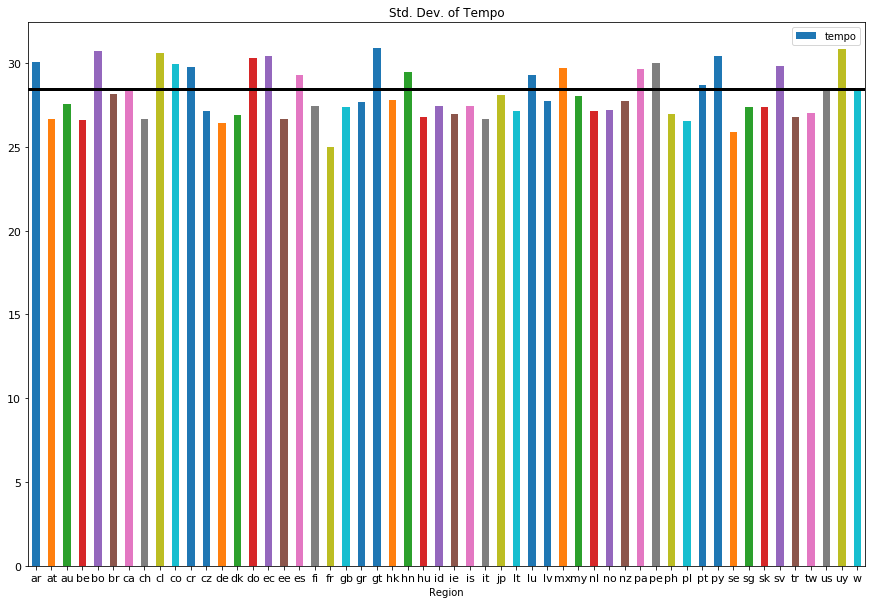

In [36]:
measuring = 'tempo'
by_var.plot.bar(x=by_var.index, y = measuring, rot=0, title='Std. Dev. of Tempo', figsize=(15,10), fontsize=11,)
plt.axhline(by_var[by_var.index == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('dev_tempo.png', bbox_inches='tight')

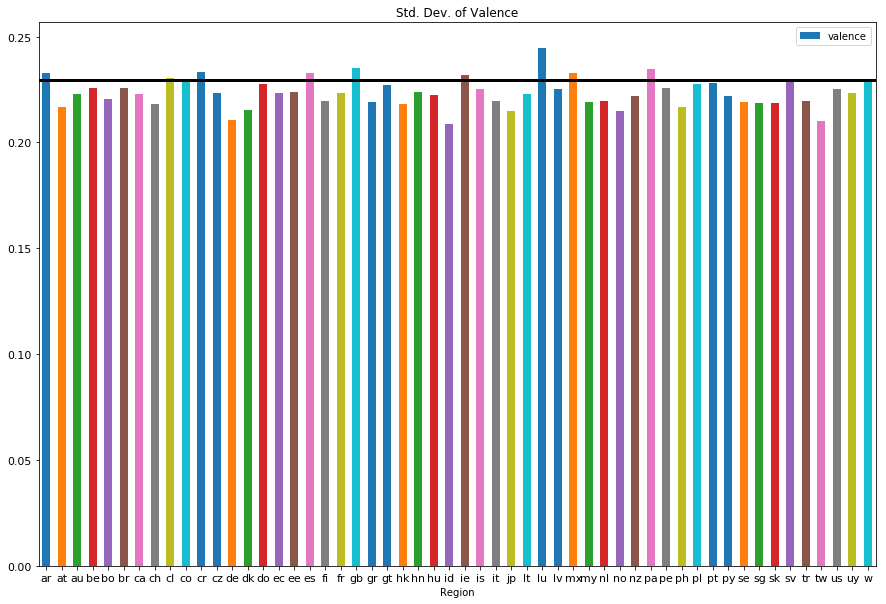

In [37]:
measuring = 'valence'
by_var.plot.bar(x=by_var.index, y = measuring, rot=0, title='Std. Dev. of Valence', figsize=(15,10), fontsize=11,)
plt.axhline(by_var[by_var.index == 'w'][measuring].values[0], color='black', linewidth=3)

plt.savefig('dev_valence.png', bbox_inches='tight')